#### Variables
**Starting**<br>
salary		： Original Dataset, Replace '?' to 'NaN'<br>
new_salary	: Remove Missing Values<br>
new_salary1	: Remove Outliers<br>

**Split data**<br>
X_train, X_test, y_train, y_test<br>
X_train_num<br>
X_train_cat <br>
X_train_num_tr : Standardize (numeric)<br>
X_train_tr      : Finalize Test Set<br>
X_test_tr      : Finalize Test Set<br>
X_train_cat_1 ~ 8 <br>
X_test_cat_1 ~ 8 

# Salary Prediction Model

## Import Python Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

pd.options.mode.chained_assignment = None #turn off warning for SettingWithCopyWarning, 
                                          #used when convert quality into categorical type
import warnings
warnings.filterwarnings("ignore")

# Data Collection

In [3]:
#salary = pd.read_csv('SalaryBackup.csv')
salary = pd.read_csv("Salary.csv", na_values = "?")

# Data Explore

In [4]:
salary.head(10)

,work_type,age,weight,education,education_years,marital_status,occupation,relationship,race,sex,investment_gain,investment_loss,company_size,weekly_hours,country,salary_range
0,Private,19,216804,7th-8th,4.0,Never-married,Other-service,Own-child,White,Male,0,0,825,33,United-States,low
1,Private,23,207546,11th,7.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,865,40,United-States,low
2,Private,41,253759,HS-grad,9.0,Never-married,Sales,Unmarried,Black,Female,0,0,727,40,United-States,low
3,Private,28,180928,Some-college,10.0,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,5013,0,328,55,United-States,low
4,Private,17,208463,HS-grad,9.0,Never-married,Sales,Own-child,White,Female,0,0,977,20,United-States,low
5,Private,73,333676,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,118,50,United-States,low
6,Local-gov,65,24824,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,793,40,United-States,low
7,Private,37,96330,Some-college,10.0,Never-married,Exec-managerial,Unmarried,Black,Female,0,0,193,40,United-States,low
8,Private,53,47396,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,427,40,United-States,low
9,NaN,61,166855,Bachelors,13.0,Married-civ-spouse,NaN,Husband,White,Male,0,0,164,10,United-States,low


In [4]:
salary.isnull().sum()

work_type          1836
age                   0
weight                0
education             0
education_years       9
marital_status        0
occupation         1843
relationship          0
race                  0
sex                   0
investment_gain       0
investment_loss       0
company_size          0
weekly_hours          0
country             583
salary_range          0
dtype: int64

In [5]:
#original shape of dataset
print("Shape",salary.shape)

Shape (32561, 16)


In [6]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   work_type        30725 non-null  object 
 1   age              32561 non-null  int64  
 2   weight           32561 non-null  int64  
 3   education        32561 non-null  object 
 4   education_years  32552 non-null  float64
 5   marital_status   32561 non-null  object 
 6   occupation       30718 non-null  object 
 7   relationship     32561 non-null  object 
 8   race             32561 non-null  object 
 9   sex              32561 non-null  object 
 10  investment_gain  32561 non-null  int64  
 11  investment_loss  32561 non-null  int64  
 12  company_size     32561 non-null  int64  
 13  weekly_hours     32561 non-null  int64  
 14  country          31978 non-null  object 
 15  salary_range     32561 non-null  object 
dtypes: float64(1), int64(6), object(9)
memory usage: 4.0+ MB


In [7]:
salary.groupby('salary_range').size()

salary_range
high     7841
low     24720
dtype: int64

In [8]:
salary.columns

Index(['work_type', 'age', 'weight', 'education', 'education_years',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'investment_gain', 'investment_loss', 'company_size', 'weekly_hours',
       'country', 'salary_range'],
      dtype='object')

*Comment for the size of "salary_range":*<br>
- Maybe need to rebalance the class **(avoid imbalanced class result / imbalanced classification challenge)**

## Numerical Feaures Analysis

In [9]:
salary.describe() 

,age,weight,education_years,investment_gain,investment_loss,company_size,weekly_hours
count,32561.000000,3.256100e+04,32552.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080609,1077.648844,87.303830,500.930838,40.437456
std,13.640433,1.055500e+05,2.572762,7385.292085,402.960219,285.784842,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,5.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,254.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,502.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,745.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,1000.000000,99.000000


Summary of the describtion of the data:
---
1. Age   : 17 - 90 years old
2. Weight: 1.376900e+04 - 1.484705e+06
3. Education_years: 1 - 16 years
4. investment_gain: 0.00 - 99999.00
5. investment_loss: 0.00 - 4356.00
6. company_size   : 5 - 1000 employees
7. weekly_hours   : 1 - 99 hours

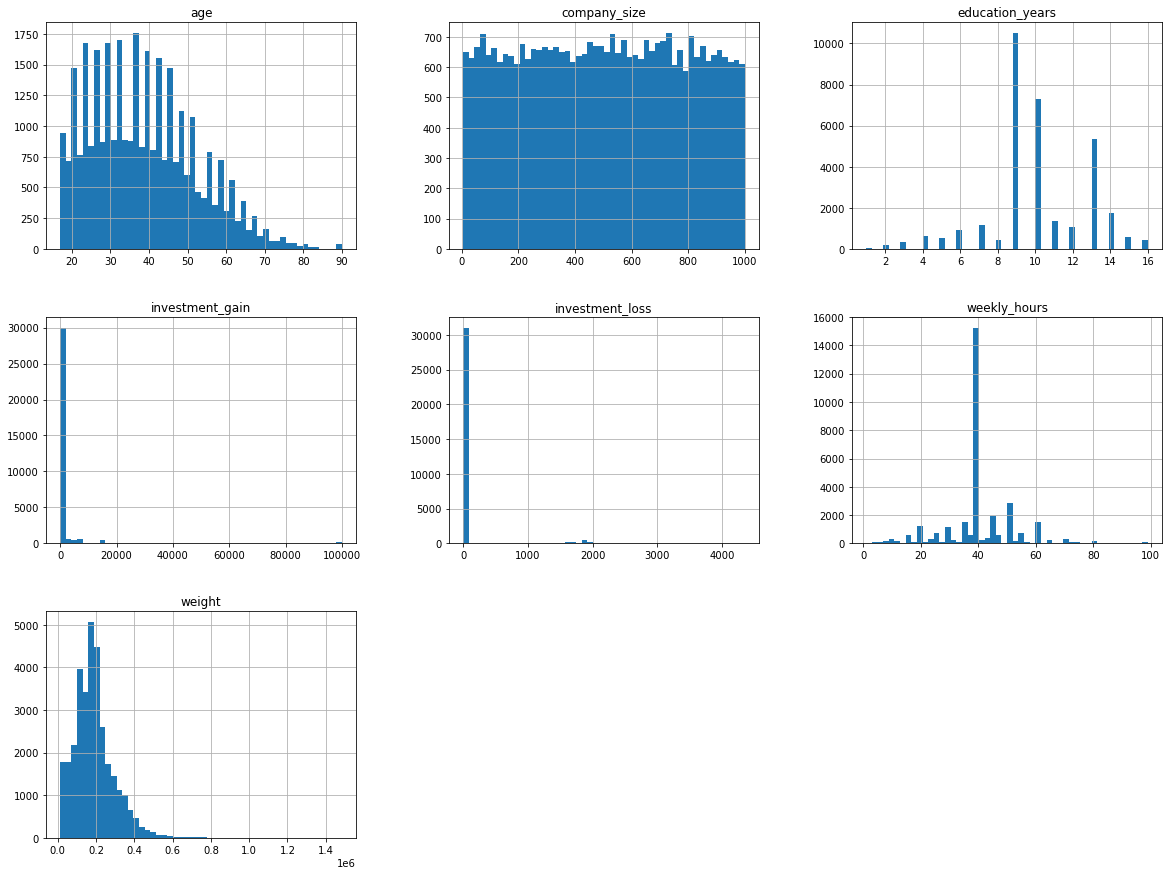

In [10]:
salary.hist(bins = 50, figsize = (20,15))
plt.show() 

Distribution data questions: <br>
    a. How is the distribution data - heavy tail issue<br>
        - 3 attributes (weight, investment_gain, investment_loss)<br>
    b. What is peculiar about the graph<br>
        - <br>
    c. Features that have different scales<br>
        - weekly_hours

## Categorical Features Analysis

In [17]:
#salary.value_counts()

Formulate data question of the: <br>
    a. How many possible values for the categorical feature<br>
        - 10 attributes<br>
    b. What is the most frequent value<br>
        - <br>
    c. What is the least frequent value<br>
        - <br>

# Data Visualization

## Correlation
1. Gives quantifiable relationship between features
2. Corr is calculated using various methods like 'pearson', 'spearman', etc.
3. Corr can be represented using correlation heatmap

In [18]:
salary.corr(method='spearman')

,age,weight,education_years,investment_gain,investment_loss,company_size,weekly_hours
age,1.000000,-0.078141,0.066267,0.124948,0.058484,0.002759,0.142907
weight,-0.078141,1.000000,-0.035704,-0.006039,-0.006914,0.003158,-0.021621
education_years,0.066267,-0.035704,1.000000,0.119170,0.074539,-0.010157,0.167127
investment_gain,0.124948,-0.006039,0.119170,1.000000,-0.066569,0.002377,0.093322
investment_loss,0.058484,-0.006914,0.074539,-0.066569,1.000000,0.003499,0.059852
company_size,0.002759,0.003158,-0.010157,0.002377,0.003499,1.000000,0.001347
weekly_hours,0.142907,-0.021621,0.167127,0.093322,0.059852,0.001347,1.000000


In [19]:
salary.corr()

,age,weight,education_years,investment_gain,investment_loss,company_size,weekly_hours
age,1.000000,-0.076646,0.036495,0.077674,0.057775,0.002589,0.068756
weight,-0.076646,1.000000,-0.043220,0.000432,-0.010252,0.004007,-0.018768
education_years,0.036495,-0.043220,1.000000,0.122649,0.079678,-0.007389,0.148050
investment_gain,0.077674,0.000432,0.122649,1.000000,-0.031615,0.004572,0.078409
investment_loss,0.057775,-0.010252,0.079678,-0.031615,1.000000,0.003726,0.054256
company_size,0.002589,0.004007,-0.007389,0.004572,0.003726,1.000000,0.000768
weekly_hours,0.068756,-0.018768,0.148050,0.078409,0.054256,0.000768,1.000000


Text(0.5, 1.0, '- Correlation matrix and Heatmap -')

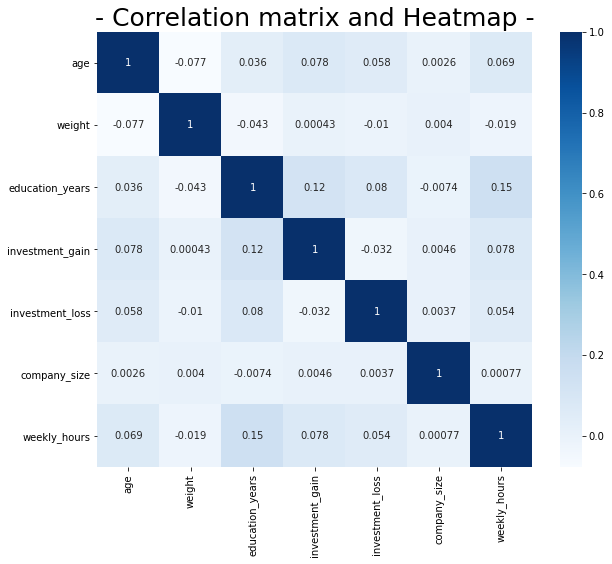

In [20]:
plt.figure(figsize =(10,8))
corrmat = salary.corr()
sb.heatmap(corrmat, square=True, annot=True, cbar=True, cmap="Blues");  #Blues
plt.title('- Correlation matrix and Heatmap -',fontsize = 25)

### Positive Correlation
- Age and Investment Gain
- Age and Investment Loss
- Weekly Hours and Age
- Weekly Hours and Education Years
- Education Years and Investment Gain
- Education Years and Investment Lost

### Negative Correlation
- Age and Weight
- Weight and Investment Lost
- Weight and Weekly Hours
- Investment Gain and Investment Loss
- Education Years and Company Size

*Observation: There are nothing much correlation between these numerical attributes

### Relationship between investment gain and salary range between male and females

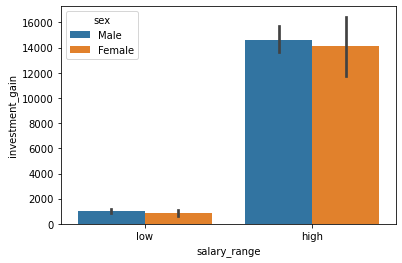

In [21]:
sb.barplot(x='salary_range',y='investment_gain',data=salary,estimator=np.std,hue='sex')

### Relationship between years of education and salary range

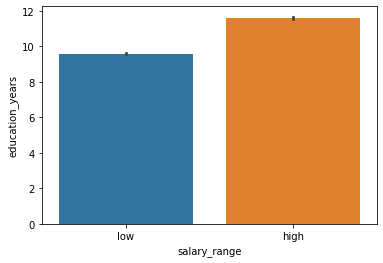

In [22]:
sb.barplot(x='salary_range',y='education_years',data=salary)

### Relationship between weekly hours worked and salary range

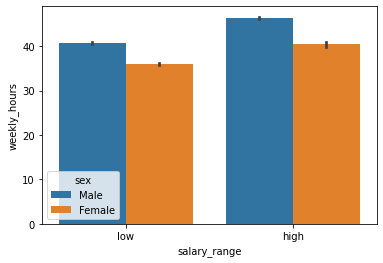

In [23]:
sb.barplot(x='salary_range',y='weekly_hours',data=salary, hue='sex')

### Relationship between age and salary range

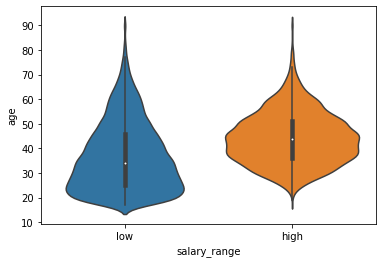

In [24]:
sb.violinplot(x='salary_range',y='age',data=salary)

### Relationship between weekly hours and age

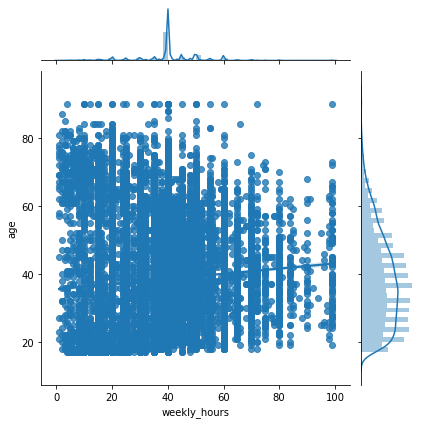

In [25]:
sb.jointplot(x='weekly_hours',y='age',data=salary, kind='reg')

### Relationship between investment gain of people of different race

Text(0.5, 1.0, '- Investment Gain of Different Races -')

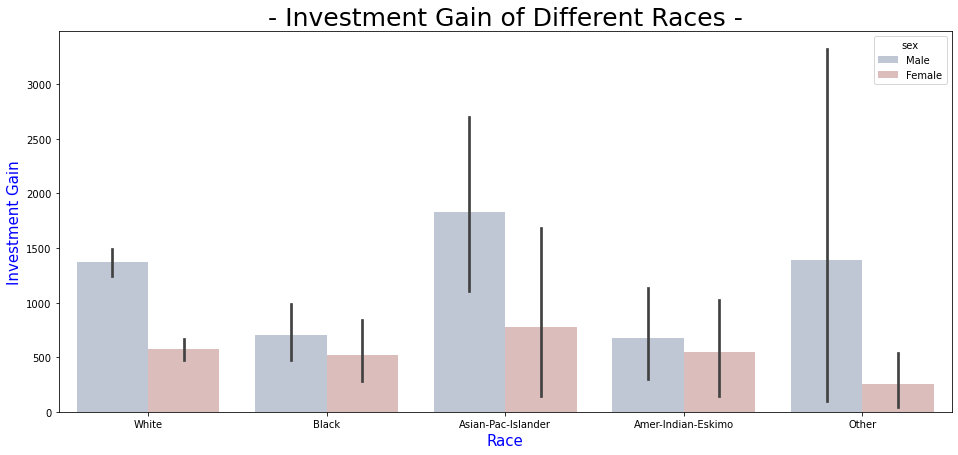

In [26]:
plt.figure(figsize =(16,7))
sb.barplot(x='race',y='investment_gain',data=salary, hue='sex',palette='vlag')

plt.xlabel('Race',fontsize = 15,color='blue')
plt.ylabel('Investment Gain',fontsize = 15,color='blue')
plt.title('- Investment Gain of Different Races -',fontsize = 25)

### Countries with most people in low salary range

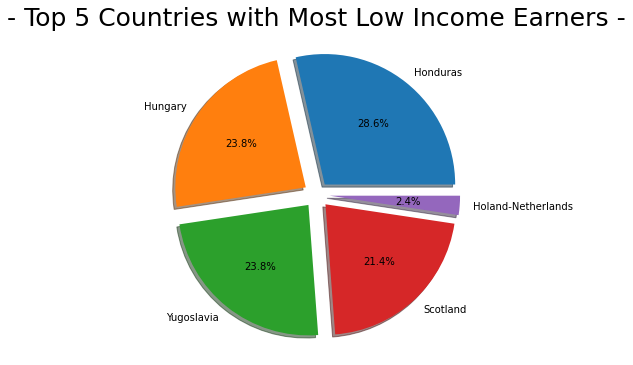

In [29]:
co = salary.groupby('salary_range')
top5 = co['country'].value_counts().tail(5)

x = top5
y = top5['low'].index.tolist()

fig, ex = plt.subplots(figsize=(10, 6))
explode = (0.1,0.1,0.1,0.1,0.1)
plt.pie(x, explode=explode,labels=y, autopct='%1.1f%%', shadow=True)
plt.title('- Top 5 Countries with Most Low Income Earners -',fontsize = 25)
plt.show()

### Countries with most people in high salary range

Text(0.5, 1.0, '- Top 5 Countries with Most Number of High Income Earners -')

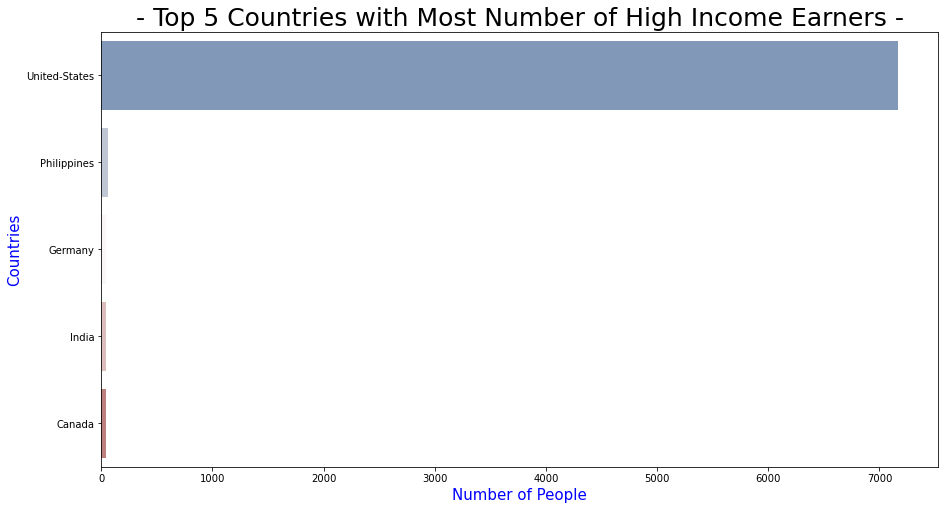

In [31]:
co = salary.groupby('salary_range')
top5 = co['country'].value_counts().head(5)

x = top5
y = top5['high'].index.tolist()

plt.figure(figsize =(15,8))
sb.barplot(x=x,y=y,data=salary,palette='vlag')

plt.xlabel('Number of People',fontsize = 15,color='blue')
plt.ylabel('Countries',fontsize = 15,color='blue')
plt.title('- Top 5 Countries with Most Number of High Income Earners -',fontsize = 25)

### Education

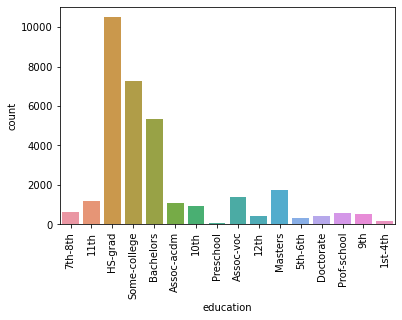

In [32]:
plot = sb.countplot(salary['education'])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.show()

### Age of participants

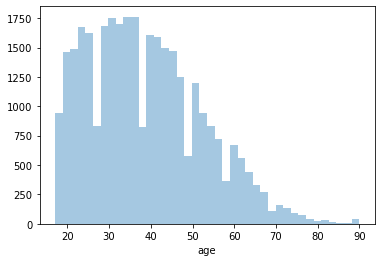

In [33]:
sb.distplot(salary['age'],kde=False,bins=40)

### Salary Range (Target)

[Text(0, 0, 'low'), Text(0, 0, 'high')]

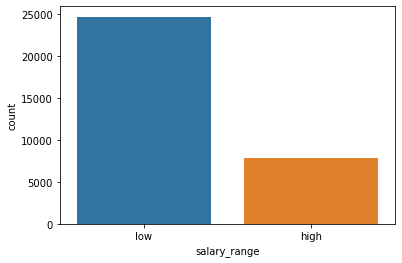

In [34]:
plot = sb.countplot(salary['salary_range'])
plot.set_xticklabels(plot.get_xticklabels())

---

# Data Preprocessing

### Handle Missing Data

In [35]:
salary.isnull().sum()

work_type          1836
age                   0
weight                0
education             0
education_years       9
marital_status        0
occupation         1843
relationship          0
race                  0
sex                   0
investment_gain       0
investment_loss       0
company_size          0
weekly_hours          0
country             583
salary_range          0
dtype: int64

In [36]:
#Drop First - for new_salary 
import copy
new_salary = copy.deepcopy(salary)
new_salary.dropna(inplace = True)
print('Original Attribute Shape:',salary.shape)
print('Clean Attribute Shape:',new_salary.shape)

Original Attribute Shape: (32561, 16)
Clean Attribute Shape: (30153, 16)


from sklearn.impute import SimpleImputer   

imputer = SimpleImputer(strategy = 'median')
imputer.fit(salary)                              # compute the median     
X_train_num_tr = imputer.transform(salary )       # fill up missing values with median value for the feature

* Result: 32561-30153 = 2408 missing values (have been removed)

In [37]:
new_salary.isnull().sum()

work_type          0
age                0
weight             0
education          0
education_years    0
marital_status     0
occupation         0
relationship       0
race               0
sex                0
investment_gain    0
investment_loss    0
company_size       0
weekly_hours       0
country            0
salary_range       0
dtype: int64

In [38]:
new_salary.head(10)

,work_type,age,weight,education,education_years,marital_status,occupation,relationship,race,sex,investment_gain,investment_loss,company_size,weekly_hours,country,salary_range
0,Private,19,216804,7th-8th,4.0,Never-married,Other-service,Own-child,White,Male,0,0,825,33,United-States,low
1,Private,23,207546,11th,7.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,865,40,United-States,low
2,Private,41,253759,HS-grad,9.0,Never-married,Sales,Unmarried,Black,Female,0,0,727,40,United-States,low
3,Private,28,180928,Some-college,10.0,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,5013,0,328,55,United-States,low
4,Private,17,208463,HS-grad,9.0,Never-married,Sales,Own-child,White,Female,0,0,977,20,United-States,low
5,Private,73,333676,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,118,50,United-States,low
6,Local-gov,65,24824,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,793,40,United-States,low
7,Private,37,96330,Some-college,10.0,Never-married,Exec-managerial,Unmarried,Black,Female,0,0,193,40,United-States,low
8,Private,53,47396,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,427,40,United-States,low
10,Local-gov,30,44566,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,833,80,United-States,low


In [39]:
new_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30153 entries, 0 to 32558
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   work_type        30153 non-null  object 
 1   age              30153 non-null  int64  
 2   weight           30153 non-null  int64  
 3   education        30153 non-null  object 
 4   education_years  30153 non-null  float64
 5   marital_status   30153 non-null  object 
 6   occupation       30153 non-null  object 
 7   relationship     30153 non-null  object 
 8   race             30153 non-null  object 
 9   sex              30153 non-null  object 
 10  investment_gain  30153 non-null  int64  
 11  investment_loss  30153 non-null  int64  
 12  company_size     30153 non-null  int64  
 13  weekly_hours     30153 non-null  int64  
 14  country          30153 non-null  object 
 15  salary_range     30153 non-null  object 
dtypes: float64(1), int64(6), object(9)
memory usage: 3.9+ MB


---

### Remove Outlier

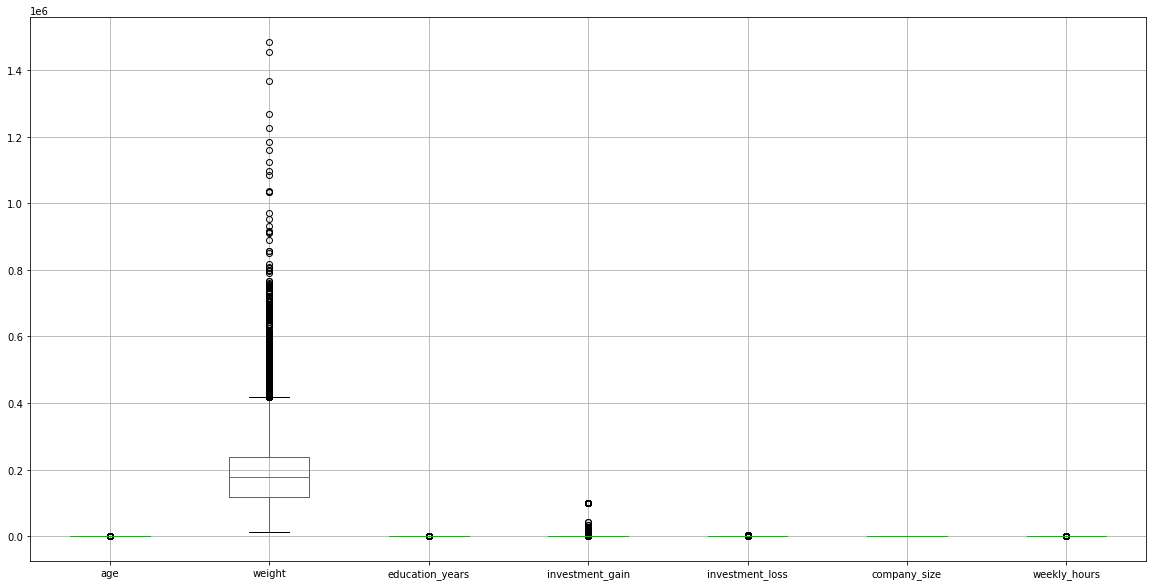

In [40]:
new_salary.boxplot(figsize=(20,10))

In [50]:
Z = (new_salary-new_salary.mean())/new_salary.std()
Z.describe()

TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [51]:
new_salary

,work_type,age,weight,education,education_years,marital_status,occupation,relationship,race,sex,investment_gain,investment_loss,company_size,weekly_hours,country,salary_range
0,Private,19,216804,7th-8th,4.0,Never-married,Other-service,Own-child,White,Male,0,0,825,33,United-States,low
1,Private,23,207546,11th,7.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,865,40,United-States,low
2,Private,41,253759,HS-grad,9.0,Never-married,Sales,Unmarried,Black,Female,0,0,727,40,United-States,low
3,Private,28,180928,Some-college,10.0,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,5013,0,328,55,United-States,low
4,Private,17,208463,HS-grad,9.0,Never-married,Sales,Own-child,White,Female,0,0,977,20,United-States,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,Private,52,146378,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,940,40,United-States,high
32555,Private,54,210736,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,843,40,United-States,high
32556,Self-emp-not-inc,56,84774,Assoc-acdm,12.0,Married-civ-spouse,Farming-fishing,Wife,White,Female,0,0,544,40,United-States,low
32557,Self-emp-inc,42,50122,HS-grad,9.0,Married-civ-spouse,Sales,Husband,White,Male,0,0,596,60,United-States,low


In [52]:
new_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30153 entries, 0 to 32558
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   work_type        30153 non-null  object 
 1   age              30153 non-null  int64  
 2   weight           30153 non-null  int64  
 3   education        30153 non-null  object 
 4   education_years  30153 non-null  float64
 5   marital_status   30153 non-null  object 
 6   occupation       30153 non-null  object 
 7   relationship     30153 non-null  object 
 8   race             30153 non-null  object 
 9   sex              30153 non-null  object 
 10  investment_gain  30153 non-null  int64  
 11  investment_loss  30153 non-null  int64  
 12  company_size     30153 non-null  int64  
 13  weekly_hours     30153 non-null  int64  
 14  country          30153 non-null  object 
 15  salary_range     30153 non-null  object 
dtypes: float64(1), int64(6), object(9)
memory usage: 3.9+ MB


In [53]:
import scipy.stats as stats
import numpy as np
print('Number of rows before discarding outliers = %d' % (new_salary.shape[0]))

#since it can be remove the numerical attributes so we have to declare it before process
num_attribute = ['age','weight','education_years','investment_gain','investment_loss','company_size','weekly_hours']
z_scores = stats.zscore(new_salary[num_attribute])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores <= 3).all(axis=1)
new_salary1 = new_salary[filtered_entries]

print('Number of rows after discarding outliers = %d' % new_salary1.shape[0])

Number of rows before discarding outliers = 30153
Number of rows after discarding outliers = 27613


### Check Duplicate

In [54]:
dups = new_salary1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


*There is no any duplicate data*

---

# Preprocessing

### Separate output vector from input matrix 

new_salary1 = new_salary

In [35]:
new_salary1

,work_type,age,weight,education,education_years,marital_status,occupation,relationship,race,sex,investment_gain,investment_loss,company_size,weekly_hours,country,salary_range
0,Private,19,216804,7th-8th,4.0,Never-married,Other-service,Own-child,White,Male,0,0,825,33,United-States,low
1,Private,23,207546,11th,7.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,865,40,United-States,low
2,Private,41,253759,HS-grad,9.0,Never-married,Sales,Unmarried,Black,Female,0,0,727,40,United-States,low
3,Private,28,180928,Some-college,10.0,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,5013,0,328,55,United-States,low
4,Private,17,208463,HS-grad,9.0,Never-married,Sales,Own-child,White,Female,0,0,977,20,United-States,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32552,Local-gov,40,26929,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,796,40,United-States,low
32553,Private,52,146378,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,940,40,United-States,high
32555,Private,54,210736,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,843,40,United-States,high
32556,Self-emp-not-inc,56,84774,Assoc-acdm,12.0,Married-civ-spouse,Farming-fishing,Wife,White,Female,0,0,544,40,United-States,low


In [36]:
#Drop targeted variable from the matrix X as the input matrix Y 
X = new_salary1.drop('salary_range', axis = 1)

#Convert the target attribute's value into boolean type (easy when process, since it only has "high" and "low")
new_salary1['salary_range'] = [1 if x=='high' else 0 for x in new_salary1['salary_range']]
y = new_salary1['salary_range']

In [37]:
#Show the shape and type class of the dataFrame for matrix X and Y
print("Shape original dataFrame", new_salary1.shape)
print("X shape",  X.shape, "type = ", type(X))
print("Y shape",  y.shape, "type = ", type(y))

Shape original dataFrame (27613, 16)
X shape (27613, 15) type =  <class 'pandas.core.frame.DataFrame'>
Y shape (27613,) type =  <class 'pandas.core.series.Series'>


### Split the Dataset - Training, Testing

In [38]:
#Load the python library - sklearn  
from sklearn.model_selection import train_test_split

#Split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

print('Original Dataset =', X.shape)
print('Training Dataset =', X_train.shape)
print('Testing Dataset =', X_test.shape)

Original Dataset = (27613, 15)
Training Dataset = (22090, 15)
Testing Dataset = (5523, 15)


### Split the input matrix - numerical and categorical sets

In [39]:
cat_attribute = ['work_type','education', 'marital_status', 'occupation', 'relationship','race','sex','country']
X_train_num = X_train.drop(cat_attribute, axis = 1)
X_train_cat = X_train[cat_attribute]

In [40]:
print(X_train_num.shape)
print(X_train_cat.shape)

(22090, 7)
(22090, 8)


### Standardize numeric data

In [41]:
from sklearn.preprocessing import StandardScaler

#Standardisation of the Numerical Attribute
X_train_num_tr = StandardScaler().fit_transform(X_train_num)

In [42]:
print('Mean:\n',X_train_num_tr.mean (axis=0))
print('\nStandard Deviation:\n',X_train_num_tr.std (axis=0))

Mean:
 [-4.63187659e-17  3.92422878e-17 -1.85275064e-16 -1.80128534e-17
 -9.97140100e-18 -3.40957583e-17  1.01643959e-16]

Standard Deviation:
 [1. 1. 1. 1. 1. 1. 1.]


In [43]:
X_train_num_tr  #transformed into ndArray

array([[-1.24690729,  0.45774738, -0.45794306, ..., -0.03799699,
         0.63229247, -0.03557418],
       [-1.40255447,  0.36034926, -1.27997803, ..., -0.03799699,
        -1.57134843,  1.82526817],
       [-0.85778932,  0.38839501, -0.45794306, ..., -0.03799699,
         0.05864627, -0.03557418],
       ...,
       [ 2.17733079, -0.28861878, -0.45794306, ..., -0.03799699,
         1.12199044, -0.03557418],
       [-1.0912601 , -0.78065763, -1.69099551, ..., -0.03799699,
        -1.37896708,  2.29047876],
       [-1.0912601 , -1.33420662,  1.18612686, ..., -0.03799699,
         0.50986797, -0.03557418]])

### One-hot encode categorical data

In [44]:
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22090 entries, 13063 to 27116
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   work_type       22090 non-null  object
 1   education       22090 non-null  object
 2   marital_status  22090 non-null  object
 3   occupation      22090 non-null  object
 4   relationship    22090 non-null  object
 5   race            22090 non-null  object
 6   sex             22090 non-null  object
 7   country         22090 non-null  object
dtypes: object(8)
memory usage: 1.5+ MB


# One-hot encode categorical data
from sklearn.preprocessing import LabelBinarizer
cat_col = [X_train_cat1,X_train_cat2,X_train_cat3,X_train_cat4,X_train_cat5,X_train_cat6,X_train_cat7,X_train_cat8]

def ohe(cat_col, col):
    cat_col[]=X_train_cat[col]
    lb_encoder = LabelBinarizer()
    cat1_encoder=LabelBinarizer()
    cat1_encoder.fit(X_train_cat1)
    X_train_cat_1=cat1_encoder.transform(X_train_cat1)      # returns numpy array
    print(X_train_cat_1.shape)
    
    #Combine all One Hot Encoded Category Lable in to one Numpy Array
    #combine=np.hstack((X_train_cat_1))
    #print("Combine",combine.shape)
    
for i in cat_attribute:
    ohe(i)

In [45]:
X_train_cat.education

13063      HS-grad
30397         11th
1059       HS-grad
1982       HS-grad
32042      HS-grad
           ...    
32140    Doctorate
18851      7th-8th
19407      HS-grad
3481          10th
27116    Bachelors
Name: education, Length: 22090, dtype: object

In [46]:
#Seperate each of the Categorical Attribute for One Hot Encoding
X_train_cat1=X_train_cat.work_type
X_train_cat2=X_train_cat.education
X_train_cat3=X_train_cat.marital_status
X_train_cat4=X_train_cat.occupation
X_train_cat5=X_train_cat.relationship
X_train_cat6=X_train_cat.race
X_train_cat7=X_train_cat.sex
X_train_cat8=X_train_cat.country

In [47]:
#One hot Encoding for Training Set
from sklearn.preprocessing import LabelBinarizer


#FIXME!:Convert These to Loops!

#Instantaneous the LabelBinarizer Object for each Category
lb_encoder=LabelBinarizer()
cat1_encoder=LabelBinarizer()
cat2_encoder=LabelBinarizer()
cat3_encoder=LabelBinarizer()
cat4_encoder=LabelBinarizer()
cat5_encoder=LabelBinarizer()
cat6_encoder=LabelBinarizer()
cat7_encoder=LabelBinarizer()
cat8_encoder=LabelBinarizer()

#Create the Label Binarizer Encoder based on Training Set Values
cat1_encoder.fit(X_train_cat1)
cat2_encoder.fit(X_train_cat2)
cat3_encoder.fit(X_train_cat3)
cat4_encoder.fit(X_train_cat4)
cat5_encoder.fit(X_train_cat5)
cat6_encoder.fit(X_train_cat6)
cat7_encoder.fit(X_train_cat7)
cat8_encoder.fit(X_train_cat8)

#Return the One Hot Encoded value as another Variable
X_train_cat_1=cat1_encoder.transform(X_train_cat1)
X_train_cat_2=cat2_encoder.transform(X_train_cat2)
X_train_cat_3=cat3_encoder.transform(X_train_cat3)
X_train_cat_4=cat4_encoder.transform(X_train_cat4)
X_train_cat_5=cat5_encoder.transform(X_train_cat5)
X_train_cat_6=cat6_encoder.transform(X_train_cat6)
X_train_cat_7=cat7_encoder.transform(X_train_cat7)
X_train_cat_8=cat8_encoder.transform(X_train_cat8)

In [48]:
print("These are the number of different values per category")
print(X_train_cat_1.shape)
print(X_train_cat_2.shape)
print(X_train_cat_3.shape)
print(X_train_cat_4.shape)
print(X_train_cat_5.shape)
print(X_train_cat_6.shape)
print(X_train_cat_7.shape)
print(X_train_cat_8.shape)

These are the number of different values per category
(22090, 7)
(22090, 14)
(22090, 7)
(22090, 14)
(22090, 6)
(22090, 5)
(22090, 1)
(22090, 40)


In [49]:
#Combine all One Hot Encoded Category Lable in to one Numpy Array
combine=np.hstack((X_train_cat_1,X_train_cat_2,X_train_cat_3,X_train_cat_4,X_train_cat_5,X_train_cat_6,X_train_cat_7,X_train_cat_8))
combine.shape

(22090, 94)

### Finalize Train Set

In [50]:
#Combine Categorical and Numerical Data Together for Training Set

#Original Traning Set
X_train_tr=np.hstack((X_train_num_tr,combine))

print(X_train_tr.shape)          #Severly Inflate the Attribute Count

#Make sure the Samples are the same for X and y!
print(y_train.shape)

(22090, 101)
(22090,)


In [51]:
y_train.value_counts()

0    16988
1     5102
Name: salary_range, dtype: int64

*Observation: May cause Imbalanced Class result

## Preprocessing on Test set

*The preprocessing steps are almost same with training set

In [52]:
#Seperate Numerical and Categorical Data for Processing
cat_attribute = ['work_type','education', 'marital_status', 'occupation', 'relationship','race','sex','country']
X_test_num = X_test.drop(cat_attribute, axis = 1)
X_test_cat = X_test[cat_attribute]
print(X_test_num.shape)
print(X_test_cat.shape)

(5523, 7)
(5523, 8)


### Standardize on Test Set 

In [53]:
from sklearn.preprocessing import StandardScaler
X_test_num_tr = StandardScaler().fit_transform(X_test_num)

In [54]:
print('Mean:\n',X_test_num_tr.mean (axis=0))
print('\nStandard Deviation:\n',X_test_num_tr.std (axis=0))
X_test_num_tr  #transformed into ndArray

Mean:
 [-1.25435301e-16  6.30392795e-17 -4.50280568e-17 -3.02331238e-17
 -1.28651591e-17  8.10505022e-17  2.50227344e-16]

Standard Deviation:
 [1. 1. 1. 1. 1. 1. 1.]


array([[-1.24620531,  1.2613252 , -0.46539946, ..., -0.03653474,
         1.26297822, -0.0340742 ],
       [ 0.15281513, -0.69891742, -0.05215168, ..., -0.03653474,
        -1.71294566, -0.0340742 ],
       [-1.01303524, -0.61572115, -0.46539946, ..., -0.03653474,
        -1.40061403, -0.0340742 ],
       ...,
       [ 1.00777206, -0.51150655,  0.7743439 , ..., -0.03653474,
        -1.27076829, -0.95839542],
       [ 1.86272899, -0.27554956, -0.46539946, ..., -0.03653474,
        -0.30218929, -0.40380269],
       [-0.46897173,  0.52323179, -0.46539946, ..., -0.03653474,
        -0.80051617, -0.0340742 ]])

### One Hot Encoding on Test Set

In [55]:
#Seperate each of the Categorical Attribute for One Hot Encoding
X_test_cat1=X_test_cat.work_type
X_test_cat2=X_test_cat.education
X_test_cat3=X_test_cat.marital_status
X_test_cat4=X_test_cat.occupation
X_test_cat5=X_test_cat.relationship
X_test_cat6=X_test_cat.race
X_test_cat7=X_test_cat.sex
X_test_cat8=X_test_cat.country

In [56]:
#One hot Encoding for Testing Set
from sklearn.preprocessing import LabelBinarizer

#Instantaneous the LabelBinarizer Object for each Category
lb_encoder=LabelBinarizer()
cat1_encoder=LabelBinarizer()
cat2_encoder=LabelBinarizer()
cat3_encoder=LabelBinarizer()
cat4_encoder=LabelBinarizer()
cat5_encoder=LabelBinarizer()
cat6_encoder=LabelBinarizer()
cat7_encoder=LabelBinarizer()
cat8_encoder=LabelBinarizer()

#Create the Label Binarizer Encoder based on Testing Set Values
cat1_encoder.fit(X_test_cat1)
cat2_encoder.fit(X_test_cat2)
cat3_encoder.fit(X_test_cat3)
cat4_encoder.fit(X_test_cat4)
cat5_encoder.fit(X_test_cat5)
cat6_encoder.fit(X_test_cat6)
cat7_encoder.fit(X_test_cat7)
cat8_encoder.fit(X_test_cat8)

#Return the One Hot Encoded value as another Variable
X_test_cat_1=cat1_encoder.transform(X_test_cat1)
X_test_cat_2=cat2_encoder.transform(X_test_cat2)
X_test_cat_3=cat3_encoder.transform(X_test_cat3)
X_test_cat_4=cat4_encoder.transform(X_test_cat4)
X_test_cat_5=cat5_encoder.transform(X_test_cat5)
X_test_cat_6=cat6_encoder.transform(X_test_cat6)
X_test_cat_7=cat7_encoder.transform(X_test_cat7)
X_test_cat_8=cat8_encoder.transform(X_test_cat8)

In [57]:
print("These are the number of different values per category")
print(X_test_cat_1.shape)
print(X_test_cat_2.shape)
print(X_test_cat_3.shape)
print(X_test_cat_4.shape)
print(X_test_cat_5.shape)
print(X_test_cat_6.shape)
print(X_test_cat_7.shape)
print(X_test_cat_8.shape)

These are the number of different values per category
(5523, 7)
(5523, 14)
(5523, 7)
(5523, 14)
(5523, 6)
(5523, 5)
(5523, 1)
(5523, 40)


In [58]:
#Combine all One Hot Encoded Category Lable in to one Numpy Array
combine_test=np.hstack((X_test_cat_1,X_test_cat_2,X_test_cat_3,X_test_cat_4,X_test_cat_5,X_test_cat_6,X_test_cat_7,X_test_cat_8))
combine_test.shape

(5523, 94)

### Finalize Test Set

In [59]:
#Combine Categorical and Numerical Data Together for Testing Dataset
X_test_tr=np.hstack((X_test_num_tr,combine_test))
#X_test_tr_std=np.hstack((X_test_num_std,combine_test))

print(X_test_tr.shape) 
print(y_test.shape)        #Make Sure the Sample Count on Both are the Same

(5523, 101)
(5523,)


In [60]:
print("Just the Summarize and Check,These are the information per array")
print('\nOriginal Dataset')
print('Salary',new_salary1.shape)
print('\nPreprocessed and Combined Training Set\n')
print('X_train_tr',X_train_tr.shape)
print('y_train',y_train.shape)

print('\nPreprocessed and Combined Testing Set')
print('X_test_tr',X_test_tr.shape)
print('y_test',y_test.shape)

print('\nNote: Make sure both X,Y have same No. of sample and Train/Test have same number of attribute')

Just the Summarize and Check,These are the information per array

Original Dataset
Salary (27613, 16)

Preprocessed and Combined Training Set

X_train_tr (22090, 101)
y_train (22090,)

Preprocessed and Combined Testing Set
X_test_tr (5523, 101)
y_test (5523,)

Note: Make sure both X,Y have same No. of sample and Train/Test have same number of attribute


### Data Preprocessing End
---

# Training Operation Process Functions

In [61]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

scores = ['accuracy', 'precision', 'recall', 'f1_macro']
overview = pd.DataFrame(columns = ["Fit Time","Score Time","Accuracy", "Precision", "Recall", "F1 score"])
clf = ["Logistic Regression", "Decision Tree Classifier", "Random Forest Classifier", "KNN Classifier", "Stochastic Gradient Descent", "MLP Classifier"]
y_pred_arr = {}
overview_acc = pd.DataFrame(columns=["Accuracy"])

### Training Function

In [62]:
from sklearn.metrics import f1_score, precision_score, recall_score

def train(model, i):
    model.fit(X_train_tr, y_train)
    y_pred = model.predict(X_train_tr)
    overview_acc.loc[clf[i]] = round(accuracy_score(y_pred, y_train)*100,4)
    #print(clf[i], "Accuracy: ",round(accuracy_score(y_pred, y_train)*100,4))

### Cross Validation Function

In [63]:
def cross_val(model, i, x = X_train_tr, y = y_train):
    model.fit(x, y)
    y_pred = cross_validate(model, x, y, cv= 5, scoring= scores)
    report = pd.DataFrame(y_pred)
    overview.loc[clf[i]] = ["{:.4f}".format(i) for i in report.mean().values]

### Classification Report Function

In [64]:
from sklearn.metrics import classification_report
def classifyReport(model, i, x = X_train_tr, y = y_train):
    model.fit(x, y)
    y_pred = cross_val_predict(model, x, y, cv= 5)
    y_pred_arr[clf[i]] = y_pred
    print(clf[i], '\n')
    print('Classification Report:\n')
    print(classification_report(y, y_pred_arr[clf[i]]))
    print()

### Confusion Matrix Function

In [65]:
from sklearn.metrics import confusion_matrix
def confusionMatrix(model, i, x = X_train_tr, y = y_train):
    #model.fit(X_train_tr, y_train)
    #y_pred = cross_val_predict(model, X_train_tr, y_train, cv= 5)
    print(clf[i])
    print('Confusion Matrix:')
    print(confusion_matrix(y,  y_pred_arr[clf[i]]))
    print('\nAccuracy:', accuracy_score(y, y_pred_arr[clf[i]]))
    tn, fp, fn, tp = confusion_matrix(y, y_pred_arr[clf[i]]).ravel()
    print("TN, FP, FN, TP : ", tn, fp, fn, tp)
    print("\n")

### Cross Validation Summary Graph

In [66]:
def cv_sum():
    pd.DataFrame([float(i) for i in overview.Accuracy], index=clf, columns=['Accuracy']).plot.bar()
    
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.xlabel("Machine Learning Algorithms")
    plt.ylabel("Accuracy Score")
    plt.title("Accuracy Graph")
    plt.show()

### Overview Performance Graph

In [67]:
def performance_sum():

    precision_sco = [float(i) for i in overview['Precision']]
    recall_sco    = [float(i) for i in overview['Recall']]
    f1_sco        = [float(i) for i in overview['F1 score']]

    pd.DataFrame([precision_sco,recall_sco,f1_sco], columns=clf, index=['Precision','Recall','F1 Score']).transpose().plot.bar()
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.xlabel("Machine Learning Algorithms")
    plt.ylabel("Score")
    plt.title("Results")
    plt.show()

---
# Model Performance Indicator Functions

### Precision-Recall Curve

In [68]:
def plot_precision_vs_recall(model, i, x = X_train_tr, y = y_train):
    precisions, recalls, thresholds = precision_recall_curve(y, y_pred_arr[clf[i]])
    ax.plot(recalls, precisions, linewidth=3, label = clf[i])
    ax.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), 'k--')

###  ROC Curve

In [69]:
def plot_roc_curve(i, y = y_train):
    fpr, tpr, treshold = roc_curve(y, y_pred_arr[clf[i]])
    ax.plot(fpr, tpr, linewidth = 3, label = clf[i])
    ax.plot([0,1], [0, 1], 'k--')

---
# Model Training
6 algorithms are used to train the model:
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. K Nearest Neighbour
5. Stochastic Gradient Descent (SGD)
6. Multi-layer Perceptron (MLP)

In [70]:
##Model 1 - Logistic Regression
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(max_iter=100000)

##Model 2 - Decision Tree
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(random_state=1)

##Model 3 - Random Forest
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()

##Model 4 - K-Nearest Neighbour (KNN)
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier(n_neighbors=20)

##Model 5 - Stochastic Gradient Descent (SGD)
from sklearn.linear_model import SGDClassifier
model5 = SGDClassifier(loss="hinge", penalty="l2", max_iter=200,random_state=42)

##Model 6 - Multi-layer Perceptron (MLP)
from sklearn.neural_network import MLPClassifier
model6 = MLPClassifier()

### Accuracy Train

In [71]:
for i, a in enumerate([model1, model2, model3, model4, model5, model6]):
    train(a, i)

In [72]:
overview_acc

,Accuracy
Logistic Regression,85.1064
Decision Tree Classifier,100.0000
Random Forest Classifier,99.9955
KNN Classifier,86.3105
Stochastic Gradient Descent,85.0113
MLP Classifier,91.3264


### Cross Validation

In [73]:
for i, a in enumerate([model1, model2, model3, model4, model5, model6]):
    cross_val(a, i)

### Classification Report

In [74]:
for i, a in enumerate([model1, model2, model3, model4, model5, model6]):
    classifyReport(a, i)

Logistic Regression 

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     16988
           1       0.72      0.57      0.64      5102

    accuracy                           0.85     22090
   macro avg       0.80      0.75      0.77     22090
weighted avg       0.84      0.85      0.84     22090


Decision Tree Classifier 

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     16988
           1       0.57      0.58      0.58      5102

    accuracy                           0.80     22090
   macro avg       0.72      0.73      0.72     22090
weighted avg       0.80      0.80      0.80     22090


Random Forest Classifier 

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     16988
           1       0.72      0.59      0.65      5102

    accuracy                    

### Confusion Matrix

In [75]:
for i, a in enumerate([model1, model2, model3, model4, model5, model6]):
    confusionMatrix(a, i)

Logistic Regression
Confusion Matrix:
[[15849  1139]
 [ 2197  2905]]

Accuracy: 0.8489814395654142
TN, FP, FN, TP :  15849 1139 2197 2905


Decision Tree Classifier
Confusion Matrix:
[[14735  2253]
 [ 2123  2979]]

Accuracy: 0.8019013128112268
TN, FP, FN, TP :  14735 2253 2123 2979


Random Forest Classifier
Confusion Matrix:
[[15801  1187]
 [ 2095  3007]]

Accuracy: 0.8514259846084201
TN, FP, FN, TP :  15801 1187 2095 3007


KNN Classifier
Confusion Matrix:
[[15805  1183]
 [ 2133  2969]]

Accuracy: 0.8498868266183793
TN, FP, FN, TP :  15805 1183 2133 2969


Stochastic Gradient Descent
Confusion Matrix:
[[15776  1212]
 [ 2173  2929]]

Accuracy: 0.8467632412856496
TN, FP, FN, TP :  15776 1212 2173 2929


MLP Classifier
Confusion Matrix:
[[15520  1468]
 [ 2086  3016]]

Accuracy: 0.8391127206880942
TN, FP, FN, TP :  15520 1468 2086 3016




---

### Cross Validation Graph

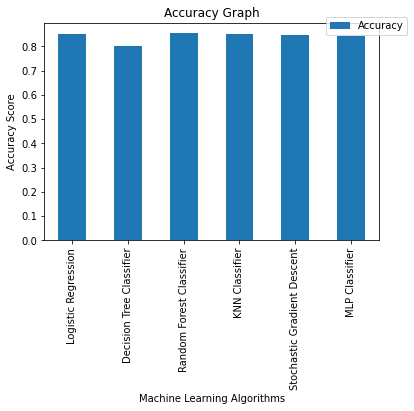

In [76]:
cv_sum()

### Overall Performance

In [77]:
overview

,Fit Time,Score Time,Accuracy,Precision,Recall,F1 score
Logistic Regression,0.4620,0.0053,0.8490,0.7184,0.5694,0.7700
Decision Tree Classifier,0.1270,0.0052,0.8019,0.5694,0.5839,0.7236
Random Forest Classifier,1.3600,0.0680,0.8539,0.7256,0.5911,0.7795
KNN Classifier,0.0043,1.0897,0.8499,0.7152,0.5819,0.7733
Stochastic Gradient Descent,0.1165,0.0046,0.8468,0.7103,0.5741,0.7681
MLP Classifier,12.6431,0.0080,0.8424,0.6763,0.6094,0.7699


### Overall Performance Graph

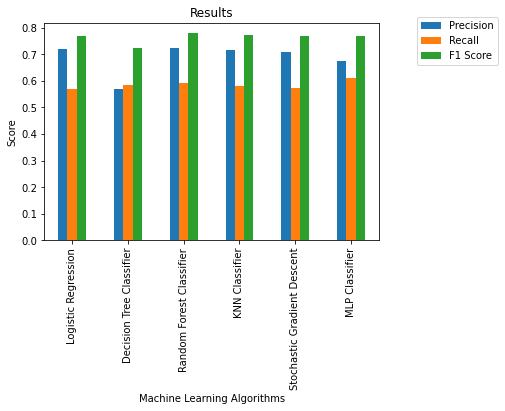

In [78]:
performance_sum()

## Precision-Recall Curve

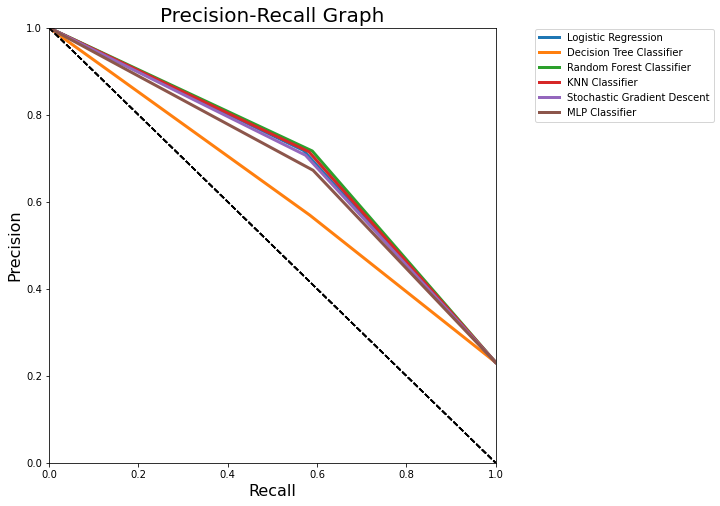

In [79]:
fig, ax = plt.subplots(figsize=(8,8))

for i in range(6):
    plot_precision_vs_recall(y_pred_arr[clf[i]], i)

ax.axis([0, 1, 0, 1])
ax.legend(bbox_to_anchor=(1.5, 1.01))
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.title ('Precision-Recall Graph', fontsize = 20)
plt.show()

## ROC Curve

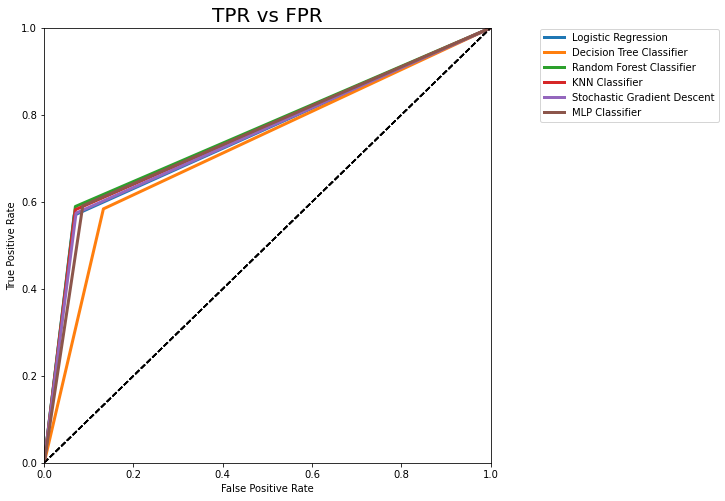

In [80]:
fig, ax = plt.subplots(figsize=(8,8))

for i in range(6):
    plot_roc_curve(i)

ax.axis([0, 1, 0, 1])
ax.legend(bbox_to_anchor=(1.1, 1.01))

plt.xlabel ('False Positive Rate')
plt.ylabel ('True Positive Rate')
plt.title('TPR vs FPR', fontsize=20)
plt.show()

## AUC Score

In [81]:
roc_auc_score_arr = [roc_auc_score(y_train, y_pred_arr[clf[i]]) for i in range(6)]
auc_score_report = pd.DataFrame(roc_auc_score_arr, columns=["AUC Score"], index = clf)
auc_score_report

,AUC Score
Logistic Regression,0.751169
Decision Tree Classifier,0.725633
Random Forest Classifier,0.759752
KNN Classifier,0.756146
Stochastic Gradient Descent,0.751372
MLP Classifier,0.752363


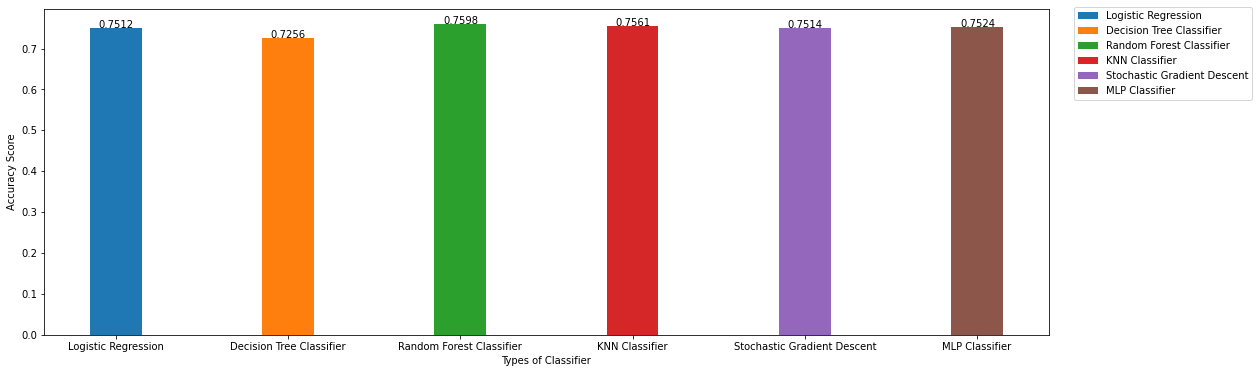

In [82]:
temp = auc_score_report["AUC Score"]
width = 0.3

fig, ax = plt.subplots(figsize=(18,6))

x1 = np.arange(len(temp))
for i in range(len(temp)):
    ax.bar(i,temp[i],width, label=overview.index[i])
    ax.text(i-0.10,temp[i],"{:.4f}".format(temp[i]))

ax.legend(bbox_to_anchor=(1.02, 1.02))
plt.xticks(x1,overview.index)
plt.xlabel("Types of Classifier")
plt.ylabel("Accuracy Score")
plt.show()

---
# Fine Tune Model
<br/>
So, now we have determined that Random Forest Classifier is the most suitable algorithm, we shall now fine tune the model. Each model comes with different hyperparameters. Hyperparameters are the settings of a machine learning that needs to be set prior to training. To find the best hyperparameter values for these settings, we shall use the Grid Search.

In [83]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_features': [2, 3, 5, 8, 10],
    'n_estimators': [20, 30, 50, 80,100]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search_forest = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

print("Performing GridSearch...")
#performing grid search
grid_search_forest.fit(X_train_tr,y_train)
print('Done')

Performing GridSearch...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Done


In [84]:
print('Best hyperparameter settings:', grid_search_forest.best_params_)
print('Best hyperparameter settings:', grid_search_forest.best_score_)

Best hyperparameter settings: {'bootstrap': True, 'max_features': 10, 'n_estimators': 100}
Best hyperparameter settings: 0.8529198542000193


In [85]:
#Get the best model learnt from the grid search

best_forest_model=grid_search_forest.best_estimator_
best_forest_model

RandomForestClassifier(max_features=10)

In [86]:
#Training Dataset
from sklearn.model_selection import cross_validate

Forest_best_result = cross_validate (best_forest_model, X_train_tr, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])
print('accuracy  = {:.4f}'.format(Forest_best_result['test_accuracy'].mean()))
print('recall    = {:.4f}'.format(Forest_best_result['test_recall'].mean()))
print('precision = {:.4f}'.format(Forest_best_result['test_precision'].mean()))
print('f1        = {:.4f}'.format(Forest_best_result['test_f1'].mean()))

accuracy  = 0.8537
recall    = 0.5902
precision = 0.7255
f1        = 0.6508


In [87]:
#Testing Dataset
from sklearn.model_selection import cross_validate

Forest_best_result = cross_validate (best_forest_model, X_test_tr, y_test, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])
print('accuracy  = {:.4f}'.format(Forest_best_result['test_accuracy'].mean()))
print('recall    = {:.4f}'.format(Forest_best_result['test_recall'].mean()))
print('precision = {:.4f}'.format(Forest_best_result['test_precision'].mean()))
print('f1        = {:.4f}'.format(Forest_best_result['test_f1'].mean()))

accuracy  = 0.8461
recall    = 0.5686
precision = 0.7076
f1        = 0.6298


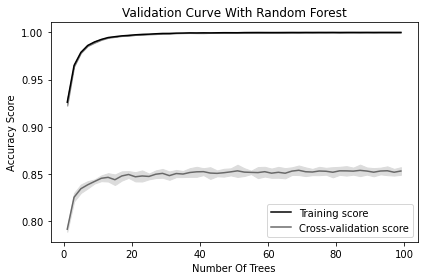

In [88]:
from sklearn.model_selection import validation_curve

# Create range of values for parameter
param_range = np.arange(1, 100, 2)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             X_train_tr, 
                                             y_train, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=5, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

---
# Testing the Model
<br/>
Tests the Hypertuned Random Forest Classifier and compare it with the other algorithms

In [89]:
best_model = grid_search_forest.best_estimator_
best_model

RandomForestClassifier(max_features=10)

In [90]:
clf = ["Logistic Regression", "Decision Tree Classifier", "Random Forest Classifier", "KNN Classifier", "Stochastic Gradient Descent", "MLP Classifier"]

In [91]:
#reset
overview = pd.DataFrame(columns=["Fit time","Score time","Accuracy","Precision","Recall","F1 score"])
y_pred_arr = {}

#new Data
clf.append("Random Forest Classifier(HyperTuned)")

In [92]:
##Model 1 - Logistic Regression
model1 = LogisticRegression(max_iter=100000)
cross_val(model1, 0, X_test_tr, y_test)

##Model 2 - Decision Tree
model2 = DecisionTreeClassifier(random_state=1)
cross_val(model2, 1, X_test_tr, y_test)

##Model 3 - Random Forest 
model3 = RandomForestClassifier()
cross_val(model3, 2, X_test_tr, y_test)

##Model 4 - K-Nearest Neighbour (KNN)
model4 = KNeighborsClassifier(n_neighbors=20)
cross_val(model4, 3, X_test_tr, y_test)

##Model 5 - Stochastic Gradient Descent (SGD)
model5 = SGDClassifier(loss="hinge", penalty="l2", max_iter=200,random_state=42)
cross_val(model5, 4, X_test_tr, y_test)

##Model 6 - Multi-layer Perceptron (MLP)
model6 = MLPClassifier()
cross_val(model6, 5, X_test_tr, y_test)

##Model7 - Random Forest (Tuned Hyperparameter)
model7 = best_model
cross_val(model7, 6, X_test_tr, y_test)

In [93]:
for i, a in enumerate([model1, model2, model3, model4, model5, model6, model7]):
    classifyReport(a, i, X_test_tr, y_test)

Logistic Regression 

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4248
           1       0.71      0.57      0.64      1275

    accuracy                           0.85      5523
   macro avg       0.80      0.75      0.77      5523
weighted avg       0.84      0.85      0.84      5523


Decision Tree Classifier 

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4248
           1       0.55      0.56      0.56      1275

    accuracy                           0.79      5523
   macro avg       0.71      0.71      0.71      5523
weighted avg       0.79      0.79      0.79      5523


Random Forest Classifier 

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4248
           1       0.71      0.57      0.63      1275

    accuracy                    

In [94]:
for i, a in enumerate([model1, model2, model3, model4, model5, model6, model7]):
    confusionMatrix(a, i, X_test_tr, y_test)

Logistic Regression
Confusion Matrix:
[[3951  297]
 [ 542  733]]

Accuracy: 0.8480898062647112
TN, FP, FN, TP :  3951 297 542 733


Decision Tree Classifier
Confusion Matrix:
[[3649  599]
 [ 555  720]]

Accuracy: 0.7910555857323918
TN, FP, FN, TP :  3649 599 555 720


Random Forest Classifier
Confusion Matrix:
[[3957  291]
 [ 553  722]]

Accuracy: 0.8471845011768966
TN, FP, FN, TP :  3957 291 553 722


KNN Classifier
Confusion Matrix:
[[3945  303]
 [ 589  686]]

Accuracy: 0.8384935723338766
TN, FP, FN, TP :  3945 303 589 686


Stochastic Gradient Descent
Confusion Matrix:
[[3888  360]
 [ 550  725]]

Accuracy: 0.835234474017744
TN, FP, FN, TP :  3888 360 550 725


MLP Classifier
Confusion Matrix:
[[3812  436]
 [ 521  754]]

Accuracy: 0.8267246061922868
TN, FP, FN, TP :  3812 436 521 754


Random Forest Classifier(HyperTuned)
Confusion Matrix:
[[3947  301]
 [ 553  722]]

Accuracy: 0.8453738910012675
TN, FP, FN, TP :  3947 301 553 722




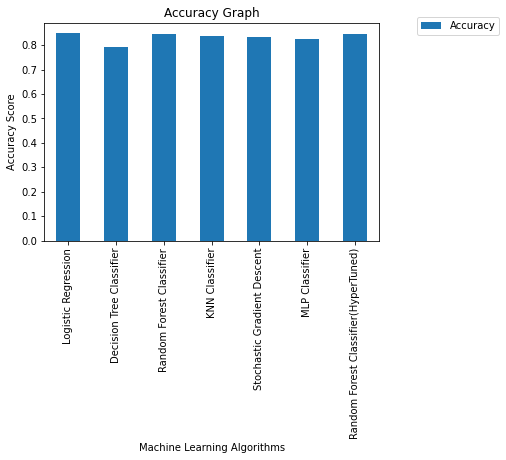

In [95]:
cv_sum()

In [96]:
overview

,Fit time,Score time,Accuracy,Precision,Recall,F1 score
Logistic Regression,0.0525,0.0024,0.8481,0.7120,0.5749,0.7698
Decision Tree Classifier,0.0257,0.0025,0.7911,0.5454,0.5647,0.7089
Random Forest Classifier,0.3414,0.0209,0.8446,0.7088,0.5553,0.7621
KNN Classifier,0.0014,0.0873,0.8385,0.6946,0.5380,0.7518
Stochastic Gradient Descent,0.0287,0.0024,0.8352,0.6843,0.5686,0.7510
MLP Classifier,2.9483,0.0037,0.8264,0.6333,0.5898,0.7493
Random Forest Classifier(HyperTuned),0.3519,0.0209,0.8454,0.7069,0.5655,0.7650


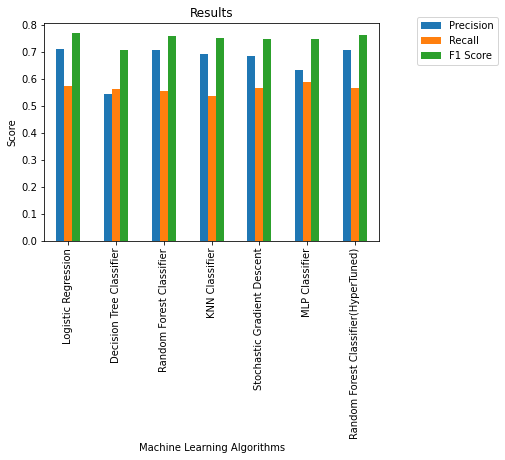

In [97]:
performance_sum()

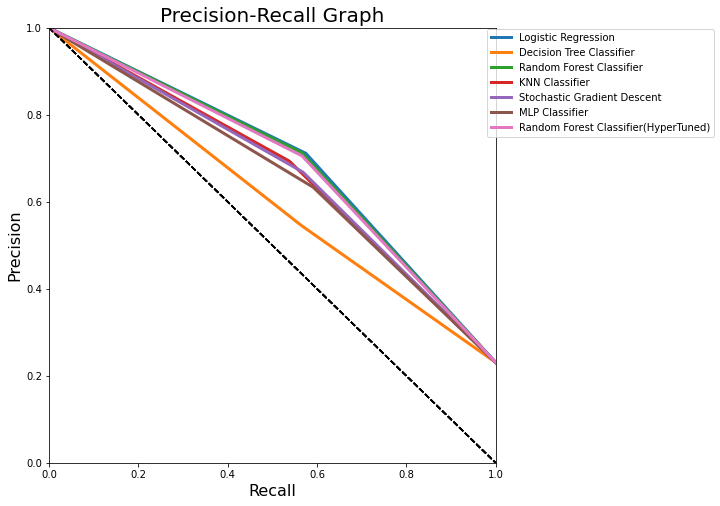

In [98]:
fig, ax = plt.subplots(figsize=(8,8))

for i in range(7):
    plot_precision_vs_recall(y_pred_arr[clf[i]], i, X_test_tr, y_test)

ax.axis([0, 1, 0, 1])
ax.legend(bbox_to_anchor=(1.5, 1.01))
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.title ('Precision-Recall Graph', fontsize = 20)
plt.show()

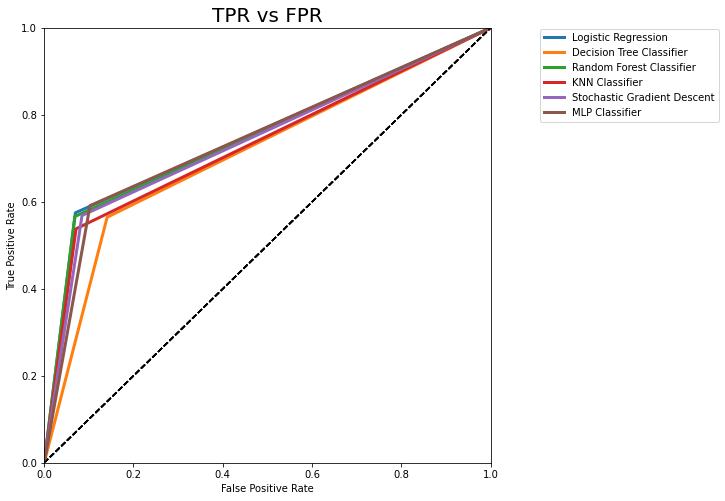

In [99]:
fig, ax = plt.subplots(figsize=(8,8))

for i in range(6):
    plot_roc_curve(i, y_test)

ax.axis([0, 1, 0, 1])
ax.legend(bbox_to_anchor=(1.1, 1.01))

plt.xlabel ('False Positive Rate')
plt.ylabel ('True Positive Rate')
plt.title('TPR vs FPR', fontsize=20)
plt.show()

In [100]:
roc_auc_score_arr = [roc_auc_score(y_test, y_pred_arr[clf[i]]) for i in range(7)]
auc_score_report = pd.DataFrame(roc_auc_score_arr, columns=["AUC Score"], index = clf)
auc_score_report

,AUC Score
Logistic Regression,0.752493
Decision Tree Classifier,0.711849
Random Forest Classifier,0.748886
KNN Classifier,0.733356
Stochastic Gradient Descent,0.741941
MLP Classifier,0.744368
Random Forest Classifier(HyperTuned),0.747709


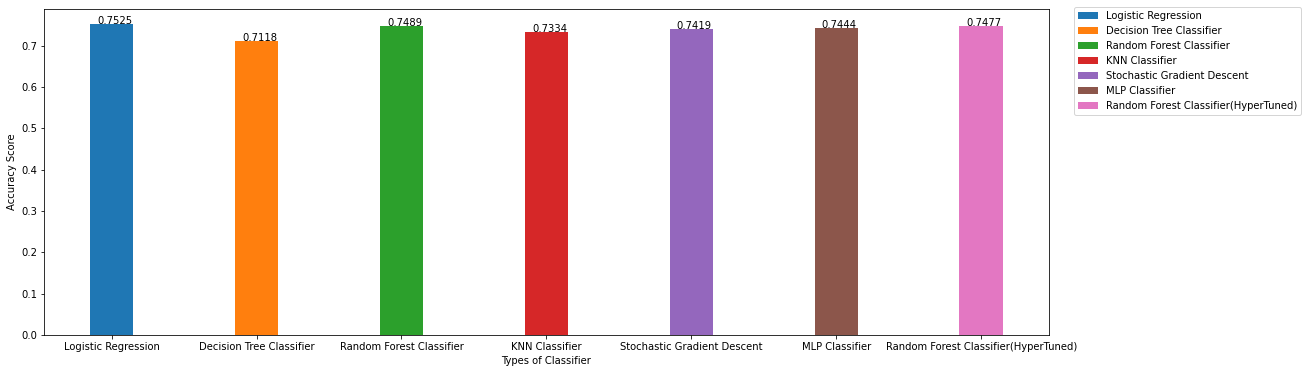

In [101]:
temp = auc_score_report["AUC Score"]
width = 0.3

fig, ax = plt.subplots(figsize=(18,6))

x1 = np.arange(len(temp))
for i in range(len(temp)):
    ax.bar(i,temp[i],width, label=overview.index[i])
    ax.text(i-0.10,temp[i],"{:.4f}".format(temp[i]))

ax.legend(bbox_to_anchor=(1.02, 1.02))
plt.xticks(x1,overview.index)
plt.xlabel("Types of Classifier")
plt.ylabel("Accuracy Score")
plt.show()